<div align="left" style="font-weight: bold; font-family: Computer Modern; font-size: 20px; text-align: left; line-height: 1.5;">
    Universidade Federal da Bahia (UFBA)
    <br>
    Departamento de Engenharia Elétrica e da Computação (DEEC)
    <br>
    Disciplina: ENGG64 - Visão Computacional
    <br>
    Docente: André Gustavo Scolari Conceição
    <br>
    Discente: Gabriel Correia
</div>


---

ED8 - CLASSIFICAÇÃO POR CORES

Resultados Obtidos no Programa: 


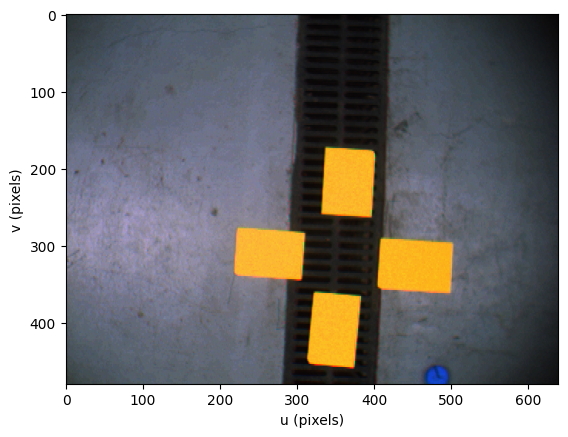

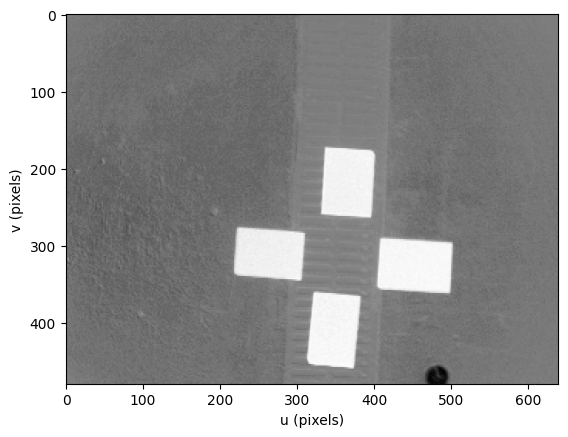

plt.show


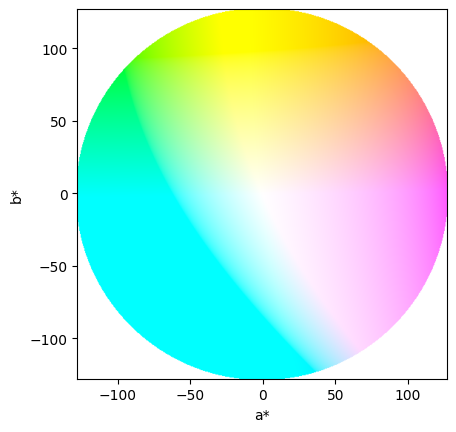

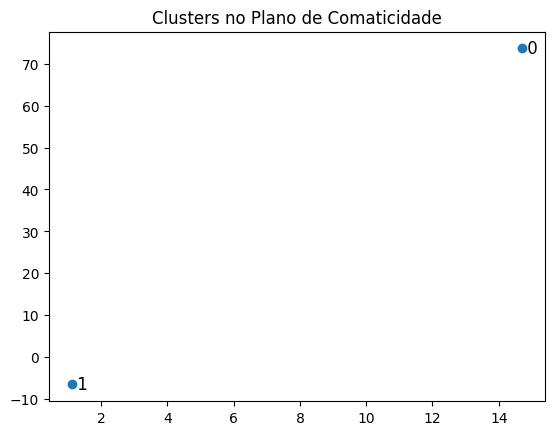

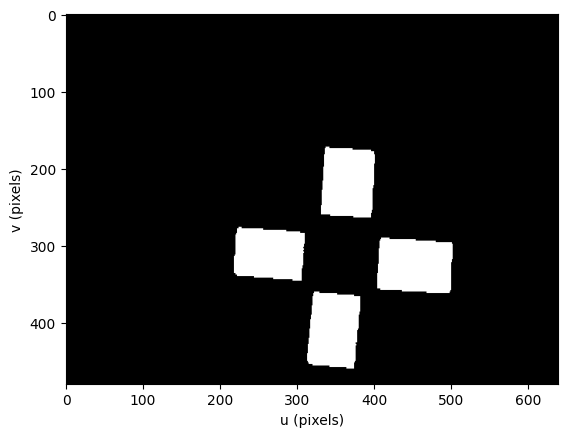

Os Centróides estão localizados nos pontos dos eixos X e Y respectivamente = [[14.714242   1.1062775]
 [73.63206   -6.5112085]]
Coordenadas dos Centróides:
Centroide 0: X=14.714241981506348, Y=1.1062774658203125
Centroide 1: X=73.6320571899414, Y=-6.511208534240723


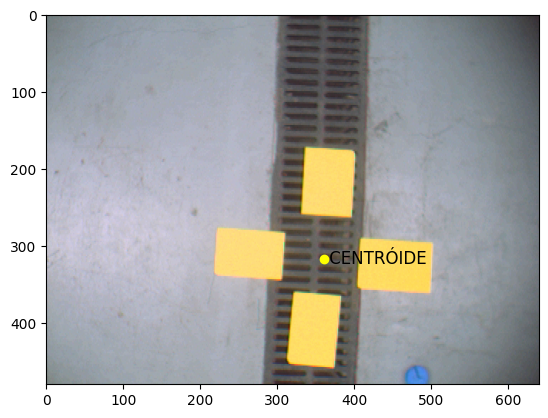

Centróide dos pixels amarelos:
X=360.2850533807829, Y=316.27508896797156


In [46]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from machinevisiontoolbox import *
import matplotlib.pyplot as plt
from spatialmath.base import plot_point

plt.close('all')
print('Resultados Obtidos no Programa: ')

### Leitura da imagem yellowtargets.png
yellowtargets = Image.Read('yellowtargets.png', dtype='float', gamma='sRGB')
yellowtargets.disp()

### Conversão para o espaço de cores CIELAB (L*a*b*) e exibição do plano de cores 'a*:b*'
ab = yellowtargets.colorspace('L*a*b*').plane('a*:b*')
ab.plane(1).disp()

### Aplicação do algoritmo k-means para agrupamento em dois clusters
classificacao, centroides, x = ab.kmeans_color(2, seed=0)

### Diagrama cromático com os clusters identificados pelos centróides
#yellowtargets.disp()
plt.clf()
plot_chromaticity_diagram(colorspace='ab')
plot_point(centroides, marker='o', text='{}')
plt.title("Clusters no Plano de Comaticidade")
#plt.savefig('ClustersPlanoCromaticidade.png')

### Exibição da imagem binária destacando o primeiro cluster (rotulado como 0)
binary_image = (classificacao == 0)
binary_image.disp()
#plt.title("ImagemBinária")
#plt.savefig('ImagemBinaria.png')

### Exibição dos centróides resultantes do k-means
print('Os Centróides estão localizados nos pontos dos eixos X e Y respectivamente =', centroides)
print('Coordenadas dos Centróides:')
for i, (x, y) in enumerate(centroides, start=0):
    print(f'Centroide {i}: X={x}, Y={y}')


### --------------------------------------------------------------------------------------------------------------
### Obtendo o Centróide dentro da Própria imagem original a partir da biblioteca OPEN CV
# Leitura da imagem yellowtargets.png com OpenCV
yellowtargets_cv2 = cv2.imread('yellowtargets.png')
yellowtargets_cv2 = cv2.cvtColor(yellowtargets_cv2, cv2.COLOR_BGR2RGB)

# Convertendo para o espaço de cores HSV
hsv_image = cv2.cvtColor(yellowtargets_cv2, cv2.COLOR_RGB2HSV)

# Ajustando os limites para a máscara
lower_yellow = np.array([20, 100, 100], dtype=np.uint8)
upper_yellow = np.array([30, 255, 255], dtype=np.uint8)

# Criando uma máscara para os pixels amarelos
yellow_mask = cv2.inRange(hsv_image, lower_yellow, upper_yellow)

# Verificando se há pixels válidos antes de calcular o centróide
if np.any(yellow_mask > 0):
    # Obtendo coordenadas dos pixels amarelos
    yellow_coords = np.argwhere(yellow_mask > 0)

    # Calculando o centróide dos pixels amarelos
    yellow_centroid = np.mean(yellow_coords, axis=0)

    # Plotando a imagem e os centróides
    plt.imshow(yellowtargets_cv2)
    plot_point([yellow_centroid[1], yellow_centroid[0]], marker='o', text='CENTRÓIDE', color='yellow')
    plt.show()

    # Exibindo os resultados
    print('Centróide dos pixels amarelos:')
    print(f'X={yellow_centroid[1]}, Y={yellow_centroid[0]}')

else:
    print('Nenhum pixel amarelo encontrado na imagem.')

### Exibição dos resultados
plt.show()

